<h1> TSNE for Doc2vec model </h1>

In [126]:
# gensim modules
from __future__ import division
from gensim import utils
from gensim.models.doc2vec import LabeledSentence, TaggedDocument
from gensim.models import Doc2Vec, Word2Vec

# numpy
import numpy as np
import re

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

from collections import defaultdict

%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
import psycopg2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

Populating the interactive namespace from numpy and matplotlib


<h3> Load in Doc2vec model indexed by asin </h3>

In [2]:
Rmodel_Doc2vec_cell=Word2Vec.load('/home/ubuntu/TallLabs/models/Rmodel_Doc2vec_cell')

In [27]:
Docvecs=[vec for vec in Rmodel_Doc2vec_cell.docvecs]

<h3> Kmeans clustering </h3>

In [150]:
kmeans=KMeans(n_clusters=100, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=2)

In [152]:
c_index=kmeans.fit_predict(Docvecs)

(array([  574.,   660.,   918.,  2346.,    96.,   317.,   884.,  3491.,
          369.,   774.]),
 array([  0. ,   9.9,  19.8,  29.7,  39.6,  49.5,  59.4,  69.3,  79.2,
         89.1,  99. ]),
 <a list of 10 Patch objects>)

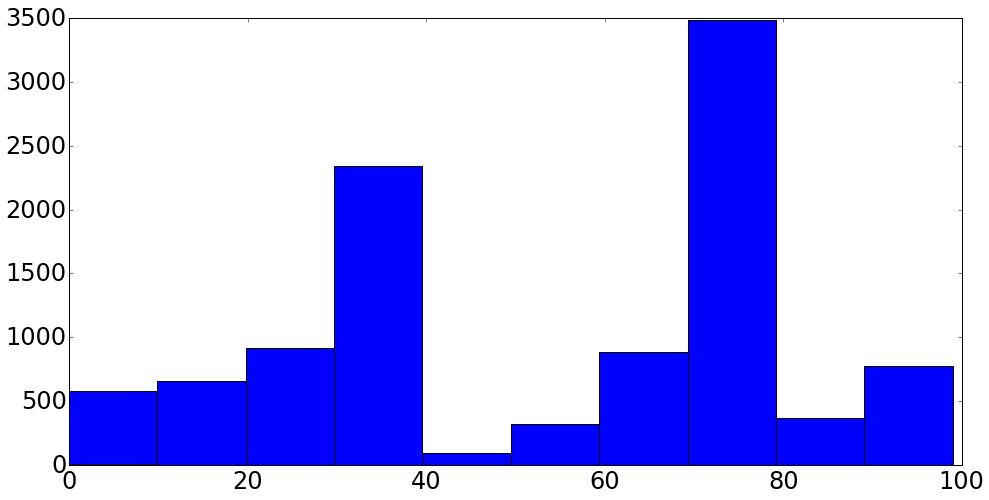

In [153]:
plt.hist(c_index)

In [123]:
DBSCAN?

In [145]:
db = DBSCAN(eps=0.05, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, p=None, random_state=None)

In [146]:
labels=db.fit_predict(Docvecs)

In [147]:
labels

array([ 0,  0, -1, ...,  0,  0,  0])

<h1> PCA </h1>

In [155]:
pca = PCA(n_components=2, whiten=True)
pcaFit=pca.fit(Docvecs)
vectors2d = pcaFit.transform(Docvecs)

<h1> TSNE </h1>

In [93]:
tsne = TSNE(n_components=2, random_state=0)
vectors2d = tsne.fit_transform(Docvecs[0:2000])

<h1> Plot </h1>

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


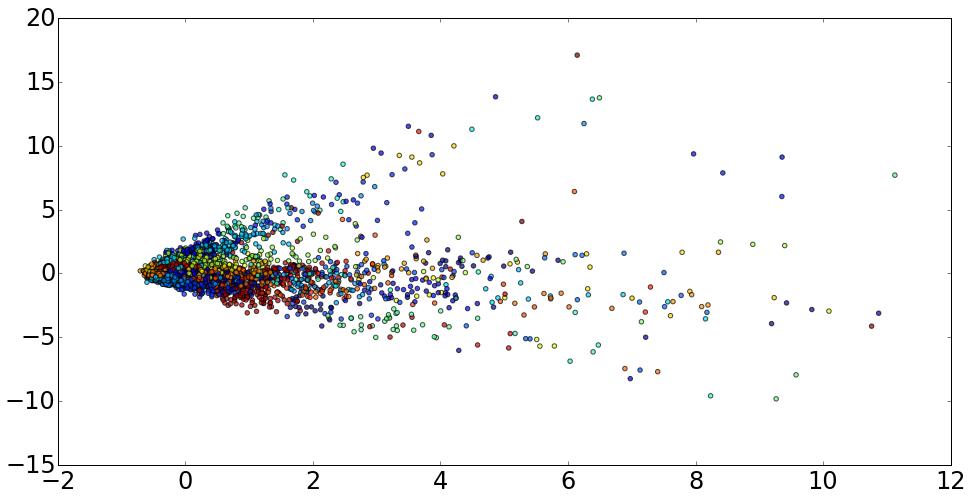

In [156]:
plt.scatter(vectors2d[:,0],vectors2d[:,1], c=cm.jet(c_index/max(c_index)), alpha=0.7)
#plt.scatter(vectors2d[Nyn:,0],vectors2d[Nyn:,1],color='b')

#xlim([-.6,0])
#ylim([-.5,.5])

In [47]:
plt.scatter?

<h1> 3D plot </h1>

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


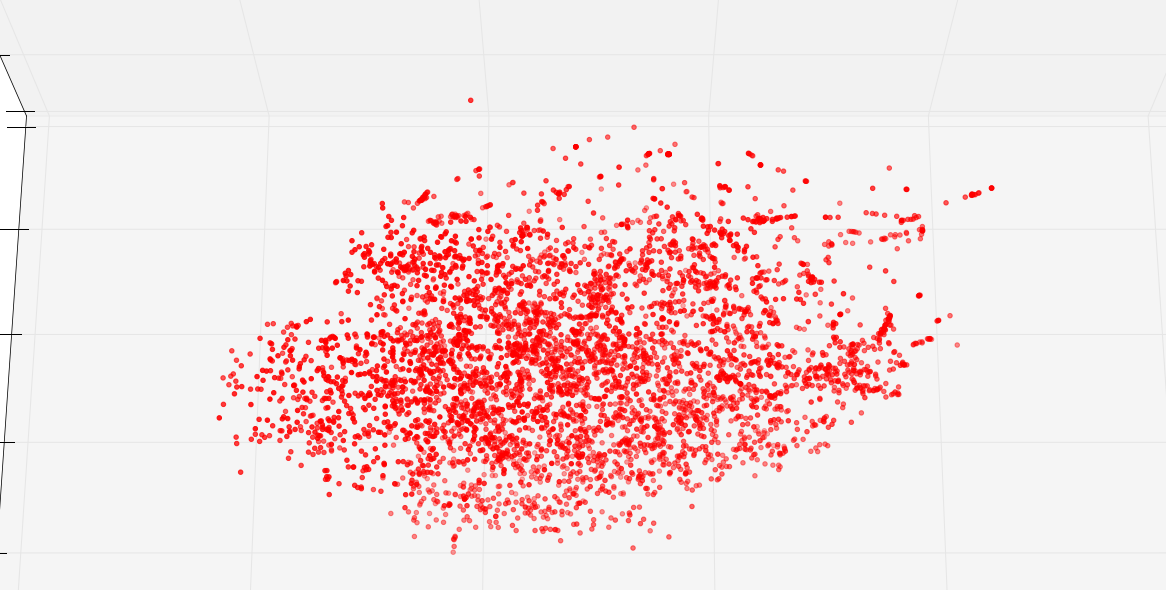

In [66]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=70, azim=90)              # elevation and angle
ax.dist=5                                  # distance
ax.scatter(vectors2d[:,0],vectors2d[:,1],vectors2d[:,2],color='r')